<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon Jul  7 14:33:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.61                 Driver Version: 572.61         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   61C    P0             14W /   75W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import torch
print(torch.cuda.is_available())       # Should print: True
print(torch.cuda.get_device_name(0))   # Should print: NVIDIA GeForce RTX 3050


True
NVIDIA GeForce RTX 3050 Laptop GPU


In [2]:
print("Current device:", torch.cuda.current_device())

Current device: 0


In [3]:
# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"


2.7.0+cu128


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Manufacturing & Quality Control
2. Autonomous Vehicles & Transportation
3. Healthcare & Medical Imaging

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting in machine learning is when a model learns the training data too well, including noise and minor details, causing it to perform poorly on new, unseen data.



## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

Clean and Augment Data

Regularization

Dropout (for Neural Networks)

Early Stopping

Use Ensemble Methods

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

✅

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
import torchvision
from torchvision import datasets
from torchvision import transforms

In [5]:
train_data = datasets.MNIST(
    root= ".",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.MNIST(
    root= ".",
    train=False,
    transform=transforms.ToTensor()
)

In [6]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [7]:
MNIST_img = train_data[0][0]
MNIST_img_label = train_data[0][1]

print(f"Img:\n {MNIST_img}\n Label:\n {MNIST_img_label}")

Img:
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0

In [8]:
MNIST_img.shape

torch.Size([1, 28, 28])

In [9]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [37]:
import matplotlib.pyplot as plt

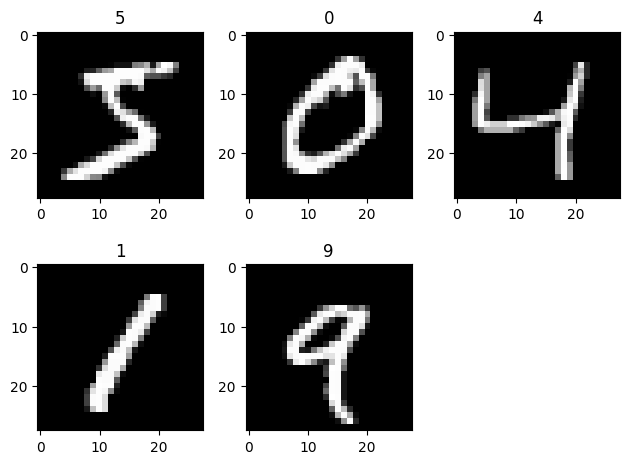

In [12]:
fig = plt.figure()

for i in range(0, 5):
    plt.subplot(2, 3, i + 1)
    img = train_data[i][0]
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(train_data[i][1])
fig.tight_layout()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader


In [12]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

🔁 Why shuffle=True for training data?

During training, shuffling the dataset every epoch is important because it:

Prevents the model from learning the order of the data, which can lead to overfitting or poor generalization.

Improves gradient estimation by making each mini-batch more representative of the overall data distribution.

Helps avoid local minima by introducing some stochasticity during optimization.

❌ Why shuffle=False for test/validation data?

During evaluation or testing, we typically want to:

Evaluate consistently — keeping the data in a fixed order ensures reproducibility of results.

Avoid unnecessary computation — shuffling doesn't benefit model evaluation, and adds overhead.

In some cases (like sequence-based tasks), the order might matter — for instance, in time series or video.



In [15]:
sample = next(iter(train_loader))
sample[0].shape, sample[1].shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [6]:
from torch import nn

In [14]:
class CNNModel(nn.Module):
    def __init__(self, in_channels, hidden_units, out_shape):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=hidden_units, kernel_size=(2,2)),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(2,2)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)) # default value of stride is kernel_size
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3,3)),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(2,2)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)) # default value of stride is kernel_size
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 5 * 5, out_features=out_shape)
        )
    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        return self.classifier(x)   

# initiate the model
model_cnn_0 = CNNModel(in_channels=1, hidden_units=5, out_shape=10)
model_cnn_0     
        

CNNModel(
  (conv_block1): Sequential(
    (0): Conv2d(1, 5, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(5, 5, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(5, 5, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=125, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [7]:
def train_step(device, model, dataloader, loss_fn, acc_fn, optimizer):
    model.to(device)
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # forward
        y_pred = model(X)

        # loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += acc_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

        # zero grad
        optimizer.zero_grad()

        # loss backward
        loss.backward()

        # step
        optimizer.step()
    train_acc /= len(dataloader)
    train_loss /= len(dataloader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(device, model, dataloader, loss_fn, acc_fn):
    model.to(device)
    test_loss, test_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # forward
        y_pred = model(X)

        # loss
        loss = loss_fn(y_pred, y)
        test_loss += loss
        test_acc += acc_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    test_acc /= len(dataloader)
    test_loss /= len(dataloader)
    print(f"Train loss: {test_loss:.5f} | Train accuracy: {test_acc:.2f}%")


In [8]:
from tqdm.auto import tqdm

In [9]:
def train_model(epochs, model, train_loader, test_loader, loss_fn, acc_fn, optimizer, device):
    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch}\n-------------------")
        train_step(device=device,
                   model=model,
                   dataloader=train_loader,
                   loss_fn=loss_fn,acc_fn=acc_fn,
                   optimizer=optimizer)
        test_step(device=device,
                   model=model,
                   dataloader=test_loader,
                   loss_fn=loss_fn,acc_fn=acc_fn)

In [10]:
from helper_functions import accuracy_fn

In [11]:
from timeit import default_timer as timer

In [12]:
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

CPU

In [24]:
model_cpu = CNNModel(in_channels=1, hidden_units=5, out_shape=10).to("cpu")
model_cpu

CNNModel(
  (conv_block1): Sequential(
    (0): Conv2d(1, 5, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(5, 5, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(5, 5, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=125, out_features=10, bias=True)
  )
)

In [25]:
criterian = nn.CrossEntropyLoss()
optimiz = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

In [26]:
# cpu
train_time_start_on_cpu = timer()
train_model(epochs=3, model=model_cpu, train_loader=train_loader, test_loader=test_loader,
            loss_fn=criterian, acc_fn=accuracy_fn, optimizer=optimiz, device="cpu")
train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device="cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------------
Train loss: 0.81420 | Train accuracy: 71.19%
Train loss: 0.24198 | Train accuracy: 92.48%
Epoch: 1
-------------------
Train loss: 0.21743 | Train accuracy: 93.41%
Train loss: 0.19609 | Train accuracy: 94.00%
Epoch: 2
-------------------
Train loss: 0.19071 | Train accuracy: 94.20%
Train loss: 0.16196 | Train accuracy: 95.05%
Train time on cpu: 74.264 seconds


GPU

In [21]:
model_gpu = CNNModel(in_channels=1, hidden_units=5, out_shape=10).to("cuda")
model_gpu

CNNModel(
  (conv_block1): Sequential(
    (0): Conv2d(1, 5, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(5, 5, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(5, 5, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=125, out_features=10, bias=True)
  )
)

In [22]:
criterian_gpu = nn.CrossEntropyLoss()
optimiz_gpu = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

In [23]:
# gpu
train_time_start_on_gpu = timer()
train_model(epochs=3, model=model_gpu, train_loader=train_loader, test_loader=test_loader,
            loss_fn=criterian_gpu, acc_fn=accuracy_fn, optimizer=optimiz_gpu, device="cuda")
train_time_end_on_gpu = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device="cuda")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------------
Train loss: 0.98144 | Train accuracy: 64.38%
Train loss: 0.41032 | Train accuracy: 85.88%
Epoch: 1
-------------------
Train loss: 0.15080 | Train accuracy: 95.34%
Train loss: 0.11161 | Train accuracy: 96.44%
Epoch: 2
-------------------
Train loss: 0.11533 | Train accuracy: 96.54%
Train loss: 0.11777 | Train accuracy: 96.34%
Train time on cuda: 102.888 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

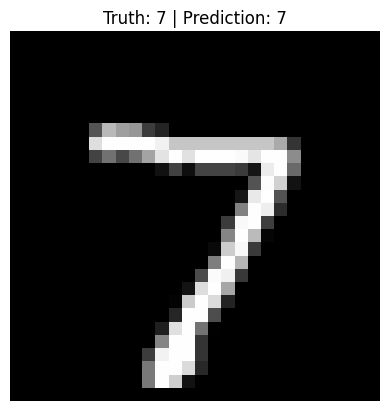

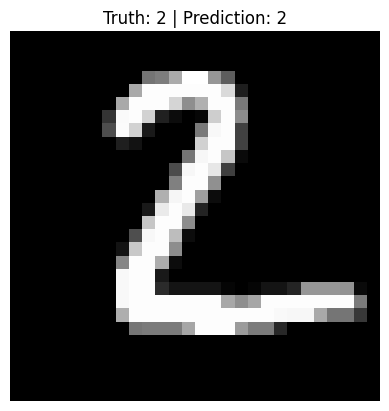

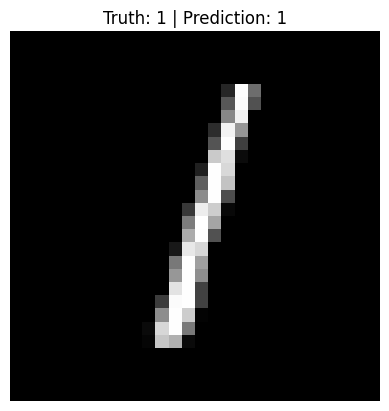

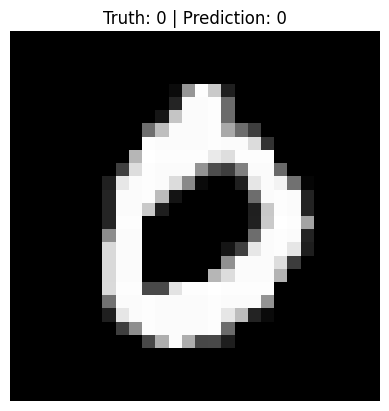

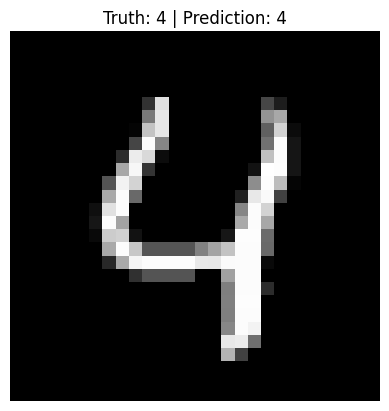

In [37]:
num_predictions = 5
for i in range(num_predictions):
    data = test_data[i][0]
    label = test_data[i][1]

    predicted_y = model_gpu(data.unsqueeze(dim=0).to(device))
    y_softmax = torch.softmax(predicted_y, dim=1)
    predicted_label = torch.argmax(y_softmax, dim=1)

    plt.figure()
    plt.imshow(data.squeeze(), cmap="gray")
    plt.title(f"Truth: {label} | Prediction: {predicted_label.cpu().item()}")
    plt.axis(False) 


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [24]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [27]:
# predictions of all test data
y_test_predictions = []
with torch.inference_mode():
    for (X, y) in tqdm(test_loader):
        y_pred = model_gpu(X.to(device))
        y_pred_prob = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        y_test_predictions.append(y_pred_prob)
    y_test_predictions=torch.cat(y_test_predictions).cpu()    

  0%|          | 0/157 [00:00<?, ?it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

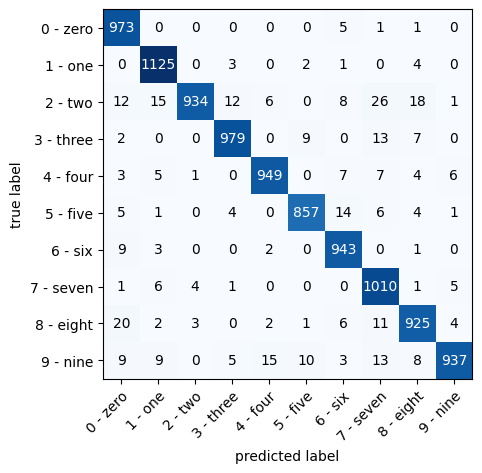

In [31]:
conf_mat = ConfusionMatrix(task='multiclass', num_classes=len(train_data.classes))
conf_mat_tensor = conf_mat(y_test_predictions, test_data.targets)

plot_confusion_matrix(conf_mat=conf_mat_tensor.numpy(), class_names=train_data.classes)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [34]:
rand_tensor = torch.rand((1,3,64,64))
conv_layer = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=2)
rand_tensor_CNN = conv_layer(rand_tensor)
print(f"Tensor's original shape: {rand_tensor.shape}\n")
print(f"Tensor's shape after CNN layer: {rand_tensor_CNN.shape}\n")

Tensor's original shape: torch.Size([1, 3, 64, 64])

Tensor's shape after CNN layer: torch.Size([1, 1, 63, 63])



## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [13]:
from torchvision import transforms

In [14]:
# Setup training data
fashionMNIST_train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform= transforms.ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
fashionMNIST_test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform= transforms.ToTensor()
)

In [15]:
fashionMNIST_test_data[0][0].shape

torch.Size([1, 28, 28])

In [16]:
fashionMNIST_class_names = fashionMNIST_train_data.classes
fashionMNIST_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [14]:
from torch.utils.data import DataLoader

In [17]:
fashionMNIST_train_loader = DataLoader(fashionMNIST_train_data, batch_size=64, shuffle=True)
fashionMNIST_test_loader = DataLoader(fashionMNIST_test_data, batch_size=64, shuffle=False)

In [17]:
from torch import nn

In [18]:
class FashionMNISTModel(nn.Module):
    def __init__(self, in_channels, num_classes, kernel_size, hidden_units):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=hidden_units, kernel_size=kernel_size, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=kernel_size, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # default value of stride is kernel_size
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=kernel_size, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=kernel_size, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # default value of stride is kernel_size
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, out_features=num_classes)
        )
    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        return self.classifier(x) 

In [28]:
fashionMNIST_model = FashionMNISTModel(in_channels=1, num_classes=len(fashionMNIST_class_names), kernel_size=3, hidden_units=10)
fashionMNIST_model

FashionMNISTModel(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [29]:
fashion_mnist_criterian = nn.CrossEntropyLoss()
fashion_mnist_optimizer = torch.optim.SGD(fashionMNIST_model.parameters(), lr=1e-1)

In [30]:
train_model(epochs=3, model=fashionMNIST_model, train_loader=fashionMNIST_train_loader, test_loader=fashionMNIST_test_loader, loss_fn=fashion_mnist_criterian
            , acc_fn=accuracy_fn, optimizer=fashion_mnist_optimizer, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------------
Train loss: 0.70298 | Train accuracy: 74.48%
Train loss: 0.49238 | Train accuracy: 82.16%
Epoch: 1
-------------------
Train loss: 0.38431 | Train accuracy: 86.05%
Train loss: 0.40804 | Train accuracy: 85.66%
Epoch: 2
-------------------
Train loss: 0.34432 | Train accuracy: 87.57%
Train loss: 0.34238 | Train accuracy: 87.46%


plot

In [32]:
# predictions of all test data
y_test_predictions = []
with torch.inference_mode():
    for (X, y) in tqdm(fashionMNIST_test_loader):
        y_pred = fashionMNIST_model(X.to(device))
        y_pred_prob = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        y_test_predictions.append(y_pred_prob)
    y_test_predictions=torch.cat(y_test_predictions).cpu()    

  0%|          | 0/157 [00:00<?, ?it/s]

In [33]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(y_test_predictions != fashionMNIST_test_data.targets)[0]
len(wrong_pred_indexes)

1260

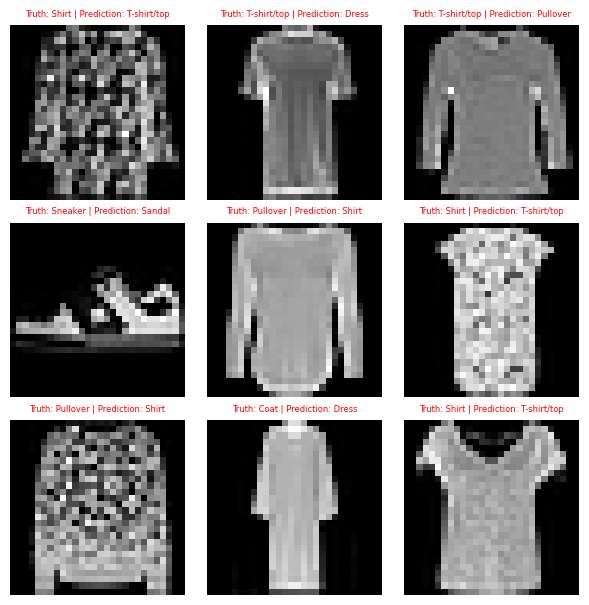

In [65]:
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)
plt.rcParams.update({'font.size': 5})
plt.figure(figsize=(6,6))
for i, random_i_in_test_data in enumerate(random_selection):
    data = fashionMNIST_test_data[random_i_in_test_data][0]
    label = fashionMNIST_test_data[random_i_in_test_data][1]

    # predicted_y = model_gpu(data.unsqueeze(dim=0).to(device))
    # y_softmax = torch.softmax(predicted_y, dim=1)
    # predicted_label = torch.argmax(y_softmax, dim=1)
    plt.subplot(3, 3, i+1)
    plt.imshow(data.squeeze(), cmap="gray")
    plt.title(f"Truth: {fashionMNIST_class_names[label]} | Prediction: {fashionMNIST_class_names[y_test_predictions[random_i_in_test_data].cpu().item()]}", c="r")
    plt.axis(False)  
plt.tight_layout() 